In [1]:
# import relevant libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def letters_only(astr):
    return astr.isalpha()

In [3]:
cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

In [4]:
for post in groups.data:
    cleaned.append(
        ' '.join(
            [
                lemmatizer.lemmatize(word.lower()) for word in post.split()
                if letters_only(word) and word not in all_names
            ]
        )
    )

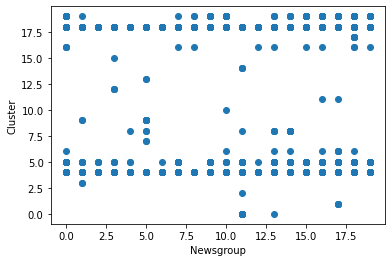

In [6]:
transformed = cv.fit_transform(cleaned)
km = KMeans(n_clusters=20)
km.fit(transformed)
labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('Newsgroup')
plt.ylabel('Cluster')
plt.show()